# Data Analysis Project: Air Quality at Shunyi Station
* __Nama:__ Ferdi Maulana Ikhsan
* __Email:__ m279b4ky1482@bangkit.academy
* __ID Dicoding:__ ferdiie29

## Define the Business Questions

1. How does the air quality trend throughout the years based on PM10?
2. Which hours of the day experience the highest pollutant levels based on PM 2.5?
3. How does the air quality in 2014 compare to 2016?

## Import Libraries/Packages

In [1]:
# importing all of the libraries/packages that we used
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# importing visualization data libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Data Wrangling

We start the project by **gathering** the data, **assessing** it, and **cleaning** the data so that we could data analysis comprehensively.

### Gathering Data

In [2]:
# setting the file csv path
file_path = '../Data/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv'
df = pd.read_csv(file_path)

# showing the first 5 rows of the air quality data frame
initial_assessment = df.head()
initial_assessment

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [3]:
# showing every column labels from the air quality data frame 
initial_columns = df.columns
initial_columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [4]:
# showing the data types of the column labels
initial_datatypes = df.dtypes
initial_datatypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

### Assessing Data

In [5]:
# Checking all of the data types in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
# checking if there is any "Not Available(NA)" or blank value in the data frame 
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

There are a lot of NA value in our data frame especially the numeric value, so we need to **"clean"** it to make it **unbiased**.

In [7]:
# checking if there is any data that isn't unique
print("Non-unique Data: ", df.duplicated().sum())

Non-unique Data:  0


Because there is zero non-unique data, meaning that all the data in our data frame is **unique**.

In [8]:
# showing descriptive statistics for our data frame
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


From the dataset info, we know that TEMP is temperature and DEWP stands for dew point. Because of that, it is make sense that the min value for TEMP and DEWP would be in negative values.

### Cleaning Data

**1. Dropping all of the unnecessary columns**
-> By dropping the unnecessary columns, we would be focus more on the column that we want to analyze.

**2. Filling the NA value**
-> To avoid biased and inaccurate result, we need to delete/fill the value for the missing or blank value in our data frame.

In [9]:
# dropping all of the unnecessary columns
df.drop(['No', 'wd', 'WSPM', 'station'], axis = 1, inplace = True)

We drop columns such as 'No', 'wd', 'WSPM', 'station' because we didn't need it for this project.

In [10]:
# replace missing values 'NA'
df.replace('NA', np.nan, inplace = True)

# fill missing values using forward fill method
df.ffill(inplace = True)

In our dataset, we have missing values represented by the term "NA". We need to replace these with a specific value using the forward fill method.

## Exploratory Data Analysis (EDA)

We will analyze our data frame by seeing its descriptive statistics and pivot table.

In [11]:
# showing descriptive statistics for our data frame
df.describe(include="all")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,80.021067,99.695209,13.454772,44.559199,1203.949321,53.861652,13.375589,1013.072335,2.450627,0.061014
std,1.177213,3.448752,8.800218,6.922285,82.094866,91.819455,19.558488,31.619471,1171.423346,54.880884,11.485335,10.178110,13.732912,0.761119
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,31.000000,2.000000,20.000000,400.000000,9.000000,3.000000,1004.700000,-8.900000,0.000000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,900.000000,41.000000,14.400000,1012.800000,3.100000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,113.000000,139.000000,16.000000,63.000000,1600.000000,76.000000,23.200000,1021.000000,15.100000,0.000000
max,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000


In [12]:
# showing the sum for every columns based on year
df.groupby('year').agg({
    'PM2.5': 'sum',
    'PM10': 'sum',
    'SO2': 'sum',
    'NO2': 'sum',
    'CO': 'sum',
    'O3': 'sum'
})

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,561177.0,706059.0,110682.8088,305526.8595,9263579.0,409895.4536
2014,750034.1,978246.7,155891.8000,428811.3000,10309400.0,507171.3000
2015,716392.6,880732.1,91588.5000,376301.6000,10391200.0,449870.2000
2016,643381.0,779427.0,83572.0000,373086.0000,9716400.0,462202.0000
2017,134874.0,151248.0,30043.0000,78698.0000,2534700.0,59466.0000


In [13]:
# showing the sum for every columns based on month
df.groupby('month').agg({
    'PM2.5': 'sum',
    'PM10': 'sum',
    'SO2': 'sum',
    'NO2': 'sum',
    'CO': 'sum',
    'O3': 'sum'
})

,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
1,283887.3,319704.3,81028.2000,162193.2000,5237800.0,89864.6000
2,251079.0,275010.0,68477.0000,121831.0000,3658000.0,111358.0000
3,289152.0,397079.0,73457.1696,165673.8692,3664613.0,137527.5554
4,213937.0,320229.0,38649.9544,128576.4983,2493841.0,183034.9756
5,199952.6,303356.3,35725.7000,141476.5000,2529135.0,255842.9296
6,203496.8,239105.3,13290.1312,96647.2067,2807007.0,264225.1590
7,215241.6,241666.2,13153.3272,83798.0376,2889589.0,277825.0504
8,159052.6,203228.3,10041.1696,81645.9895,2618800.0,243897.7760
9,179911.0,218411.0,14086.1296,97334.4406,2524494.0,117478.9290


## Visualization & Explanatory Analysis

### First Question: How does the air quality trend throughout the years based on PM10?

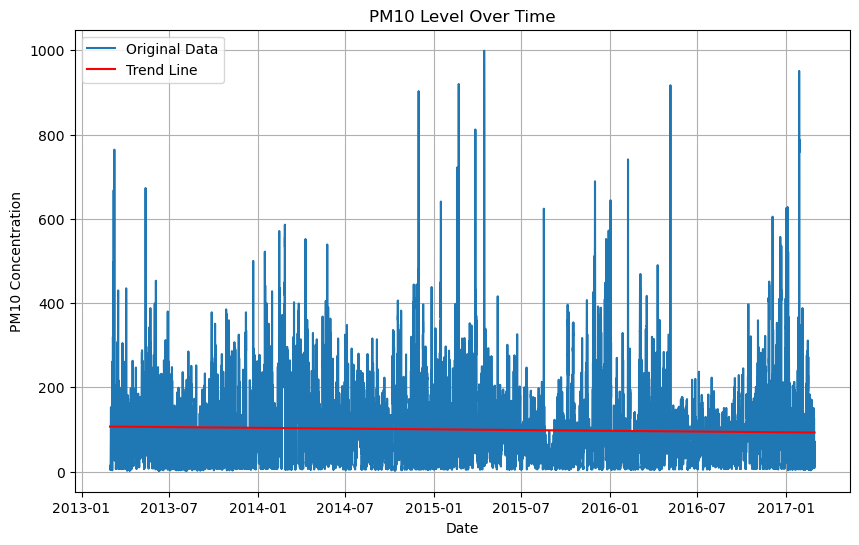

In [14]:
# create 'datetime' column from 'year', 'month', 'day', and 'hour'
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# convert 'datetime' to integer
df['datetime_int'] = df['datetime'].astype('int64')  # Nanoseconds as integer

# fitting trend line
z = np.polyfit(df['datetime_int'], df['PM10'], 1)
p = np.poly1d(z)
df['trendline'] = p(df['datetime_int'])

# plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['PM10'], label='Original Data')
plt.plot(df['datetime'], df['trendline'], color='red', label='Trend Line')

plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.title('PM10 Level Over Time')
plt.legend()
plt.grid(True)
plt.show()

Based on the graph above, the trend line is static or looks like a horizontal line. It means that throughout the year, the PM10 concentration trend is constant.

### Second Question: Which hours of the day experience the highest pollutant levels based on PM 2.5?

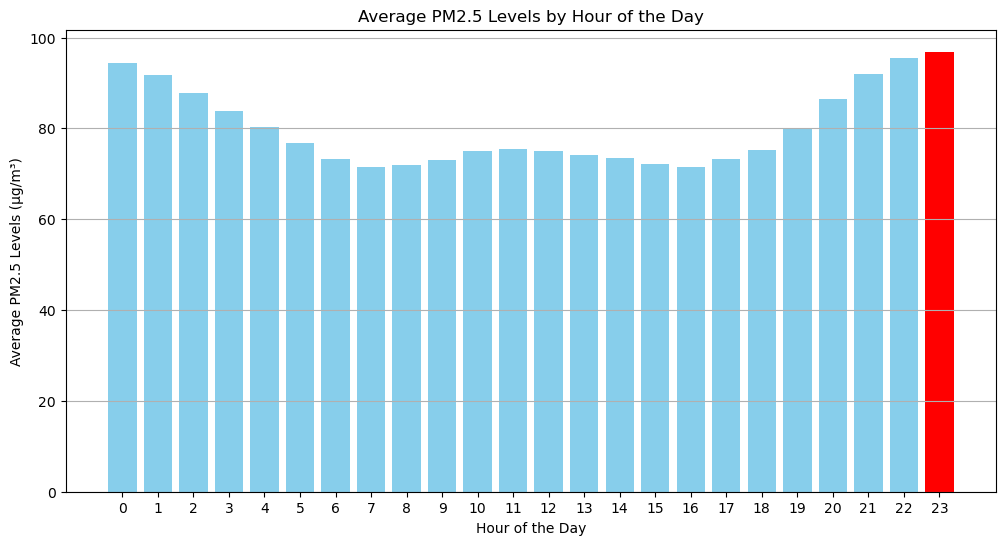

In [15]:
hourly_pm25 = df.groupby('hour')['PM2.5'].mean()

# Find the hour with the highest average PM2.5
max_hour = hourly_pm25.idxmax()  # Corrected the method name to 'idxmax'
colors = ['skyblue' if hour != max_hour else 'red' for hour in hourly_pm25.index]  # Highlight max in orange

# Plotting the results as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(hourly_pm25.index, hourly_pm25.values, color=colors)
plt.title('Average PM2.5 Levels by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average PM2.5 Levels (µg/m³)')
plt.xticks(range(24))  # Set x-ticks for each hour
plt.grid(axis='y')

# Show the plot
plt.show()

By looking at the bar chart, the highest PM2.5 levels is at the middle of the night, followed by an hour before and an hour after midnight.

### Third Question: How does the air quality in 2014 compare to 2016?

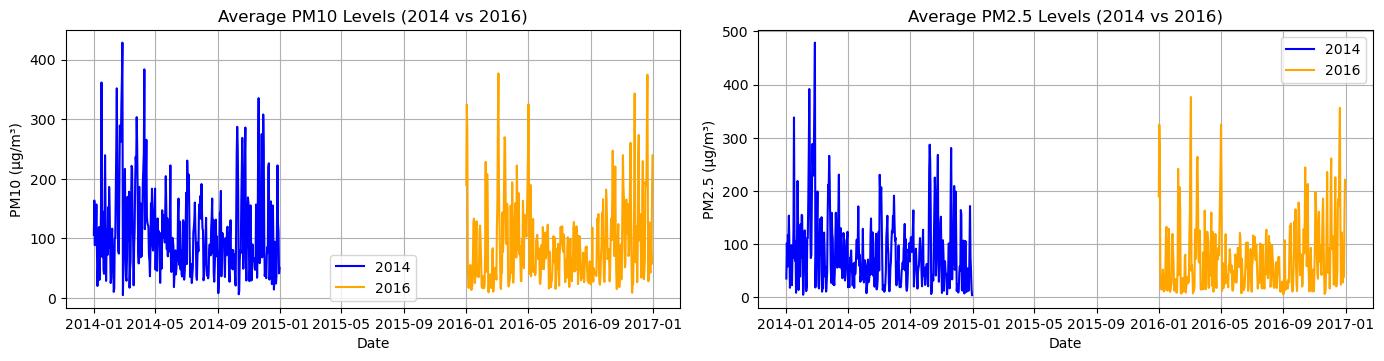

In [16]:
# filter data for the years 2014 and 2016
data_2014 = df[df['year'] == 2014]
data_2016 = df[df['year'] == 2016]

daily_avg_2014 = data_2014.groupby(['year', 'month', 'day'])[['PM10', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()
daily_avg_2016 = data_2016.groupby(['year', 'month', 'day'])[['PM10', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

# create a date column
daily_avg_2014['date'] = pd.to_datetime(daily_avg_2014[['year', 'month', 'day']])
daily_avg_2016['date'] = pd.to_datetime(daily_avg_2016[['year', 'month', 'day']])

# plotting
plt.figure(figsize=(14, 10))

# plot for PM10
plt.subplot(3, 2, 1)
plt.plot(daily_avg_2014['date'], daily_avg_2014['PM10'], label='2014', color='blue')
plt.plot(daily_avg_2016['date'], daily_avg_2016['PM10'], label='2016', color='orange')
plt.title('Average PM10 Levels (2014 vs 2016)')
plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
plt.legend()
plt.grid()

# plot for PM2.5
plt.subplot(3, 2, 2)
plt.plot(daily_avg_2014['date'], daily_avg_2014['PM2.5'], label='2014', color='blue')
plt.plot(daily_avg_2016['date'], daily_avg_2016['PM2.5'], label='2016', color='orange')
plt.title('Average PM2.5 Levels (2014 vs 2016)')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Using the time series plot and comparing the 2014 and 2016 results, we see that PM2.5 and PM10 levels are high from January to May and October to December but low from June to September.

## Advanced Analysis

### Holt-Winters Exponential Smoothing

Air quality dataset provide data that record every day and every hour of the air quality in Shuyin Station. Because of that, **Holt-Winters Exponential Smoothing** is a good approach to do forecasting. This time, we forecasting the SO2 with the assumption that the seasonal period is daily (every 24 hours).

In [17]:
# create a datetime index
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
df = df.asfreq('h') 

# apply Holt-Winters
model = ExponentialSmoothing(df['SO2'], seasonal='add', seasonal_periods=24)
fit = model.fit(optimized=True)
df['SO2_forecast'] = fit.fittedvalues

# forecast for the next 24 hour
forecast_steps = 24  
df_forecast = pd.DataFrame(fit.forecast(steps=forecast_steps), columns=['SO2_forecast'])
df_forecast.index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='h')

print(df[['hour', 'day', 'month', 'year', 'SO2', 'SO2_forecast']])
print("\nFuture SO2 Forecast:")
print(df_forecast)

                     hour  day  month  year   SO2  SO2_forecast
datetime                                                       
2013-03-01 00:00:00     0    1      3  2013   3.0      2.228668
2013-03-01 01:00:00     1    1      3  2013   3.0      2.204065
2013-03-01 02:00:00     2    1      3  2013   3.0      3.394143
2013-03-01 03:00:00     3    1      3  2013   3.0     -1.410052
2013-03-01 04:00:00     4    1      3  2013   3.0      1.629969
...                   ...  ...    ...   ...   ...           ...
2017-02-28 19:00:00    19   28      2  2017   8.0      7.455727
2017-02-28 20:00:00    20   28      2  2017  17.0      8.917972
2017-02-28 21:00:00    21   28      2  2017   4.0     18.365152
2017-02-28 22:00:00    22   28      2  2017   9.0      5.406388
2017-02-28 23:00:00    23   28      2  2017  13.0      8.632045

[35064 rows x 6 columns]

Future SO2 Forecast:
                     SO2_forecast
2017-03-01 00:00:00     10.944480
2017-03-01 01:00:00      6.881552
2017-03-01 02:00:0

## Conclusion

- First question conclusion: Constant trend line meaning that the PM10 concentration levels on average are the same every day. This could be affected by how CO2, SO2, NO2, and O3 increase and/or decrease considering PM10 is affected by these. 
- Second question conclusion: PM2.5 levels on average increase when it's nighttime. This means that the air quality at night is worse than it's daytime.
- Third question conclusion: PM2.5 and PM10 levels on average show patterns both in 2014 and 2016, indicating that there is a seasonal pattern in air quality.